In [76]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [77]:
df=pd.read_csv('Bias_correction.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# Attribute Information:


1. station - used weather station number: 1 to 25
    
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
    
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
    
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
    
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
    
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
    
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
    
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
    
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
    
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
    
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
    
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
    
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
    
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
    
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
    
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
    
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
    
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
    
19. lat - Latitude (Â°): 37.456 to 37.645
    
20. lon - Longitude (Â°): 126.826 to 127.135
    
21. DEM - Elevation (m): 12.4 to 212.3
    
22. Slope - Slope (Â°): 0.1 to 5.2
    
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
    
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
    
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8



In [78]:
pd.set_option('display.max_columns',None)

In [79]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [80]:
#checking the datatype of each column 
print(df.dtypes)
# All features are of float type except date which is a object type data
print(df.info())

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null  

In [81]:
df.shape

(7752, 25)

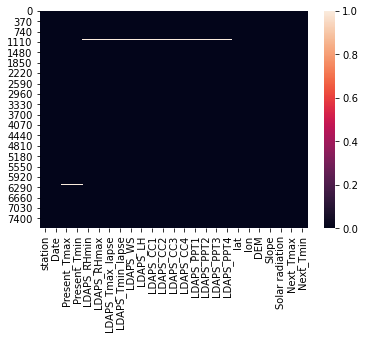

In [82]:
#checking null values using heat map
sns.heatmap(df.isnull())


In [83]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [84]:
#dropping the nan values 
df.dropna(how='any',inplace=True)

In [85]:
df.shape

(7588, 25)

In [86]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [87]:
df["Year"] = pd.to_datetime(df.Date, format="%Y-%m-%d").dt.year

In [88]:
df["Month"] = pd.to_datetime(df.Date, format="%Y-%m-%d").dt.month

In [89]:
df["Day"] = pd.to_datetime(df.Date, format="%Y-%m-%d").dt.day

In [90]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30


In [91]:
df['Month'].value_counts()

7    3820
8    3652
6     116
Name: Month, dtype: int64

In [92]:
df['Day'].value_counts()

30    366
19    250
27    250
17    249
16    249
8     249
21    249
1     249
29    248
28    248
4     248
7     248
15    248
22    248
9     247
14    247
26    247
3     247
12    247
5     246
2     246
18    246
11    246
13    245
25    245
24    245
23    245
6     244
20    225
10    222
31     99
Name: Day, dtype: int64

In [93]:
df['Year'].value_counts()

2014    1547
2015    1533
2013    1510
2017    1506
2016    1492
Name: Year, dtype: int64

In [94]:
df.drop(['Date'],axis=1,inplace=True)

# Data Analysis Through Visualization

{'bodies': [<matplotlib.collections.PolyCollection at 0x157f4a9cf70>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x157f4a9cdc0>,
 'cmins': <matplotlib.collections.LineCollection at 0x157f4aa9400>,
 'cbars': <matplotlib.collections.LineCollection at 0x157f4aa96d0>}

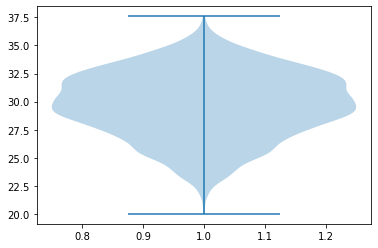

In [95]:
plt.violinplot(df["Present_Tmax"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x157f5783ee0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x157f4a52580>,
 'cmins': <matplotlib.collections.LineCollection at 0x157f4add610>,
 'cbars': <matplotlib.collections.LineCollection at 0x157f5792310>}

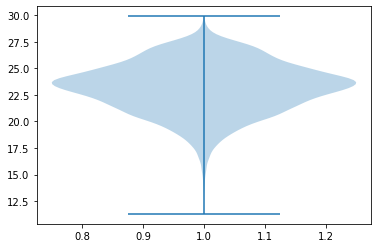

In [96]:
plt.violinplot(df["Present_Tmin"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x157f57dcc10>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x157f57dc940>,
 'cmins': <matplotlib.collections.LineCollection at 0x157f57e90a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x157f57e9370>}

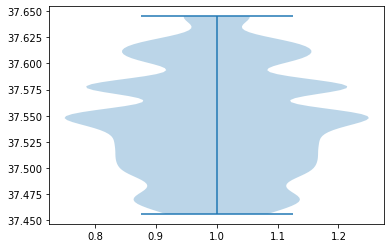

In [97]:
plt.violinplot(df["lat"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x157f5836e80>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x157f5836cd0>,
 'cmins': <matplotlib.collections.LineCollection at 0x157f5845310>,
 'cbars': <matplotlib.collections.LineCollection at 0x157f58455e0>}

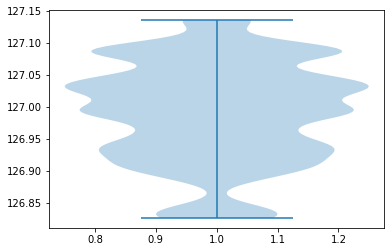

In [98]:
plt.violinplot(df["lon"])

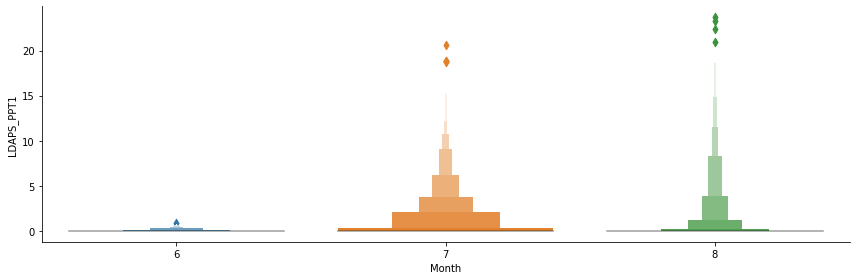

In [99]:
sns.catplot(y = "LDAPS_PPT1", x = "Month", data = df.sort_values("LDAPS_PPT1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


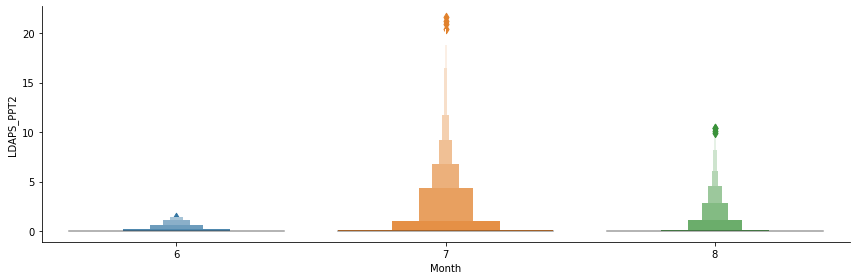

In [100]:
sns.catplot(y = "LDAPS_PPT2", x = "Month", data = df.sort_values("LDAPS_PPT2", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


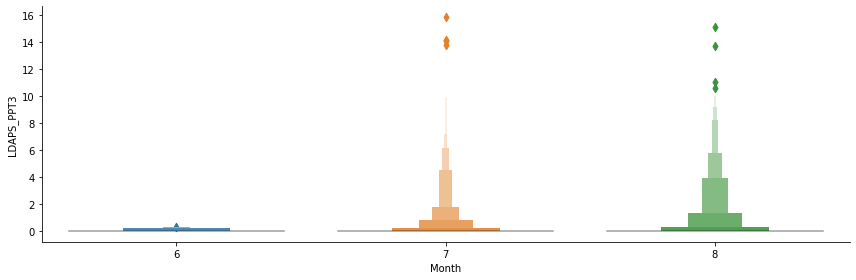

In [101]:
sns.catplot(y = "LDAPS_PPT3", x = "Month", data = df.sort_values("LDAPS_PPT3", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


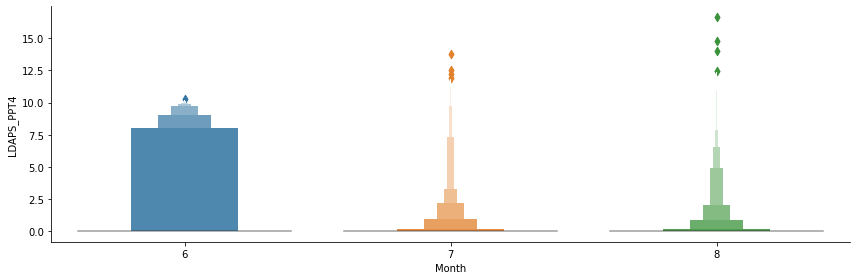

In [102]:
sns.catplot(y = "LDAPS_PPT4", x = "Month", data = df.sort_values("LDAPS_PPT4", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


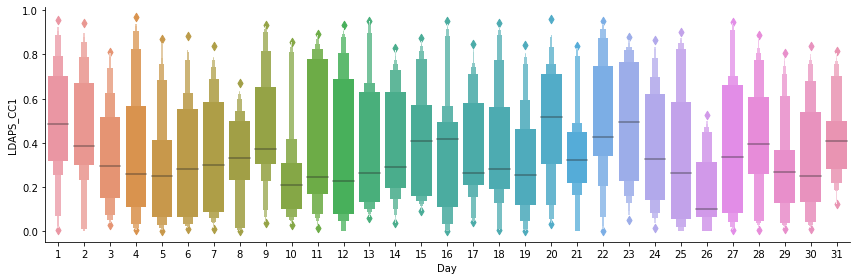

In [103]:
sns.catplot(y = "LDAPS_CC1", x = "Day", data = df.sort_values("LDAPS_CC1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


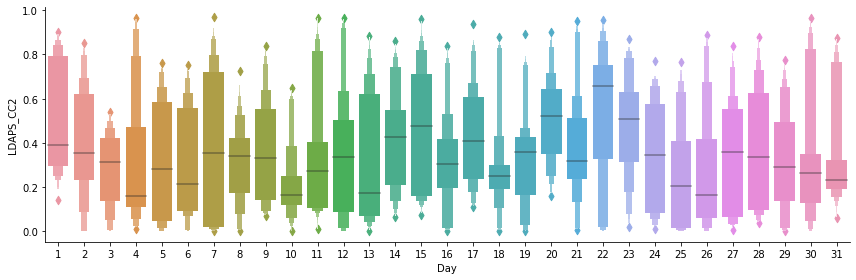

In [104]:
sns.catplot(y = "LDAPS_CC2", x = "Day", data = df.sort_values("LDAPS_CC2", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


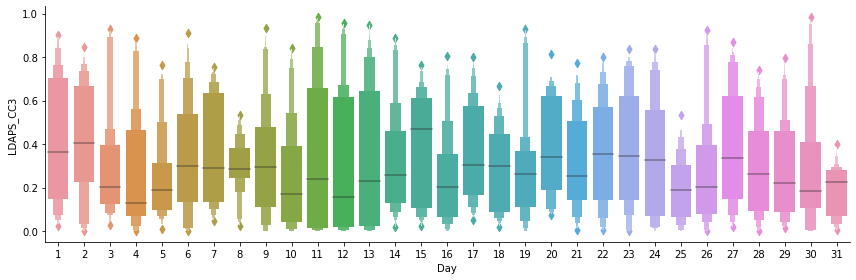

In [105]:
sns.catplot(y = "LDAPS_CC3", x = "Day", data = df.sort_values("LDAPS_CC3", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


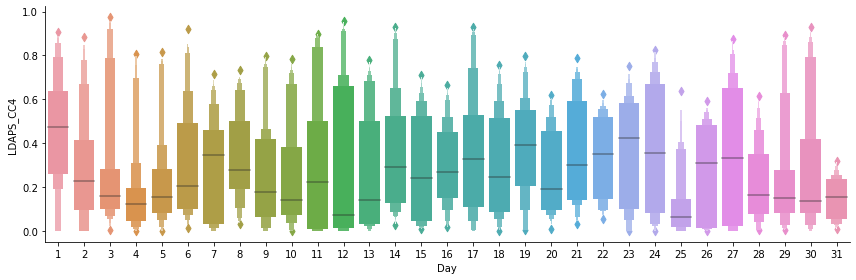

In [106]:
sns.catplot(y = "LDAPS_CC4", x = "Day", data = df.sort_values("LDAPS_CC4", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


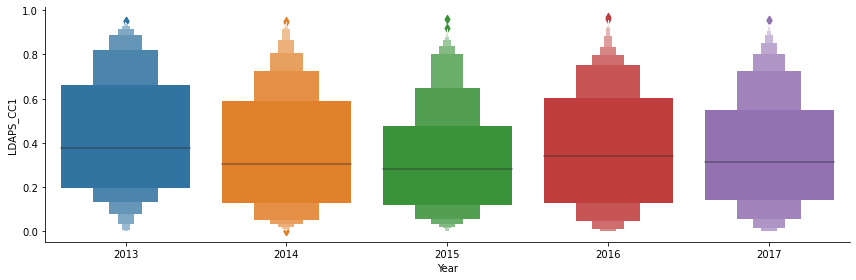

In [107]:
sns.catplot(y = "LDAPS_CC1", x = "Year", data = df.sort_values("LDAPS_CC4", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


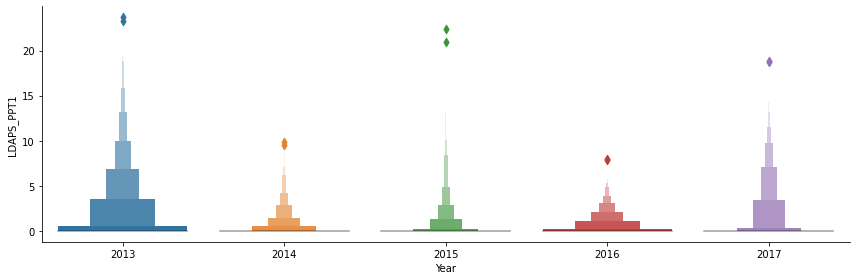

In [108]:
sns.catplot(y = "LDAPS_PPT1", x = "Year", data = df.sort_values("LDAPS_PPT1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


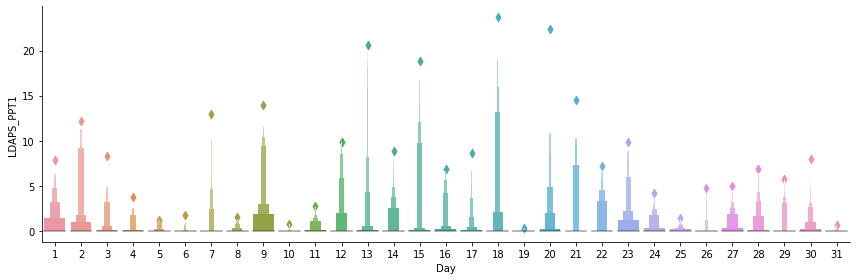

In [109]:
sns.catplot(y = "LDAPS_PPT1", x = "Day", data = df.sort_values("LDAPS_PPT1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


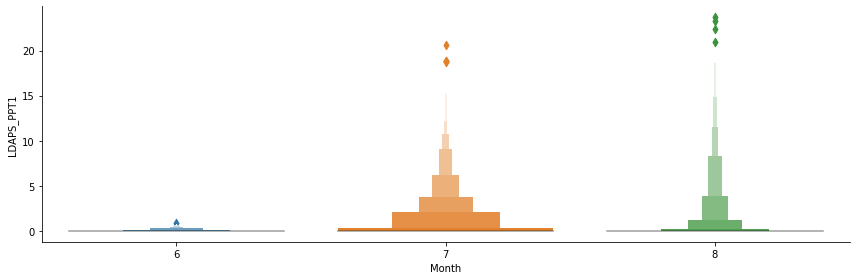

In [110]:
sns.catplot(y = "LDAPS_PPT1", x = "Month", data = df.sort_values("LDAPS_PPT1", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


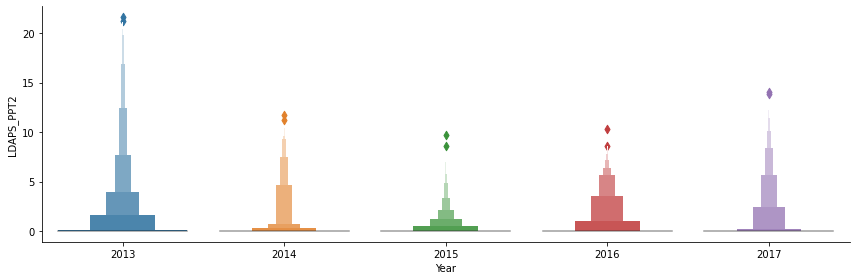

In [111]:
sns.catplot(y = "LDAPS_PPT2", x = "Year", data = df.sort_values("LDAPS_PPT2", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


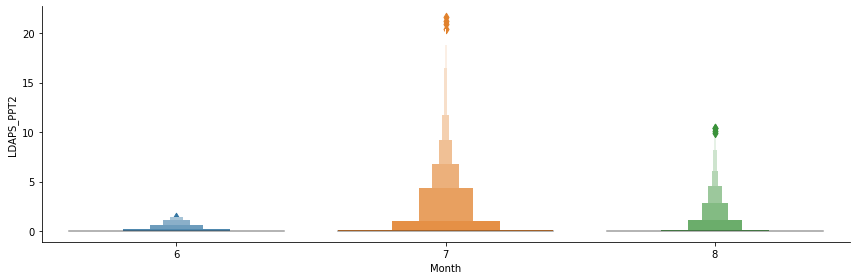

In [112]:
sns.catplot(y = "LDAPS_PPT2", x = "Month", data = df.sort_values("LDAPS_PPT2", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


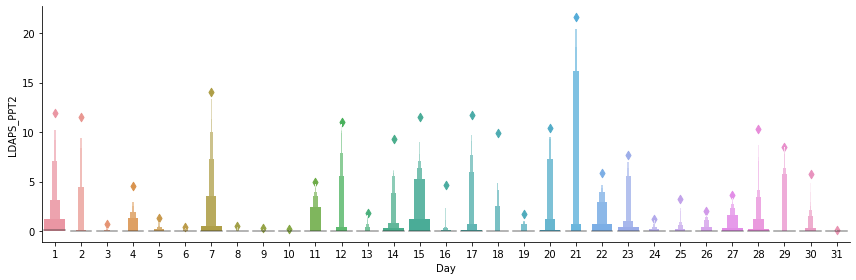

In [113]:
sns.catplot(y = "LDAPS_PPT2", x = "Day", data = df.sort_values("LDAPS_PPT2", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


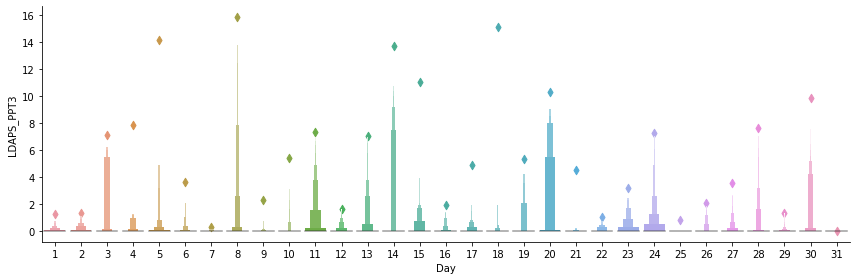

In [114]:
sns.catplot(y = "LDAPS_PPT3", x = "Day", data = df.sort_values("LDAPS_PPT3", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


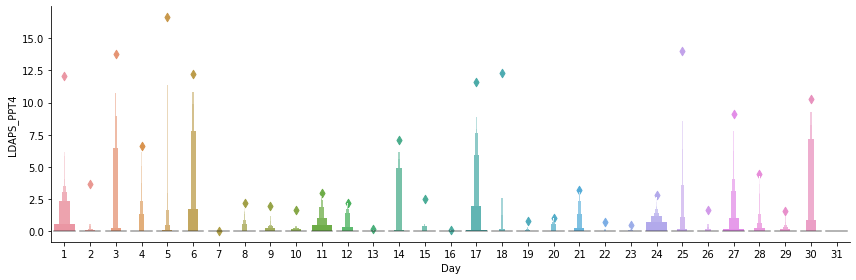

In [115]:
sns.catplot(y = "LDAPS_PPT4", x = "Day", data = df.sort_values("LDAPS_PPT4", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


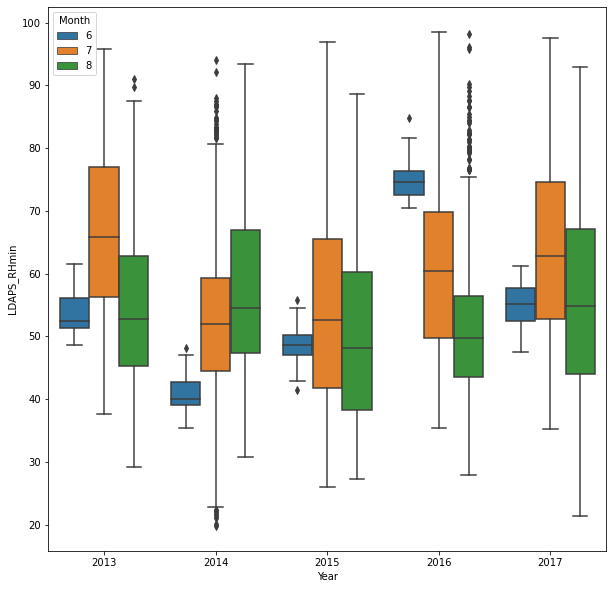

In [126]:
plt.subplots(figsize=(10,10))
sns.boxplot(x='Year',y='LDAPS_RHmin',hue='Month',data=df)

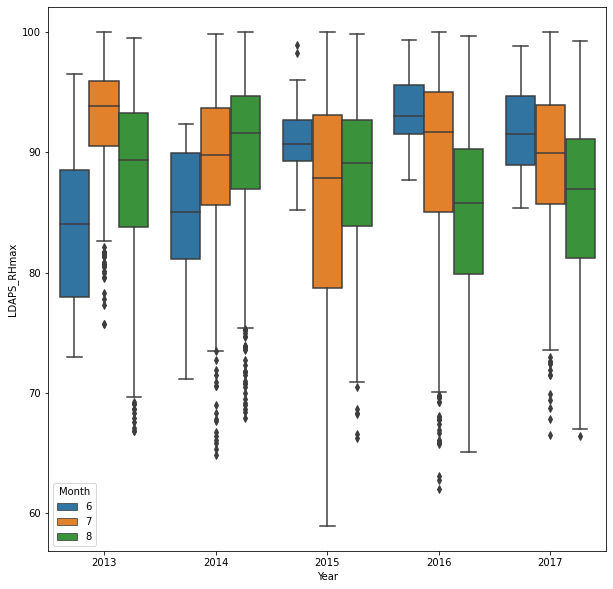

In [127]:
plt.subplots(figsize=(10,10))
sns.boxplot(x='Year',y='LDAPS_RHmax',hue='Month',data=df)

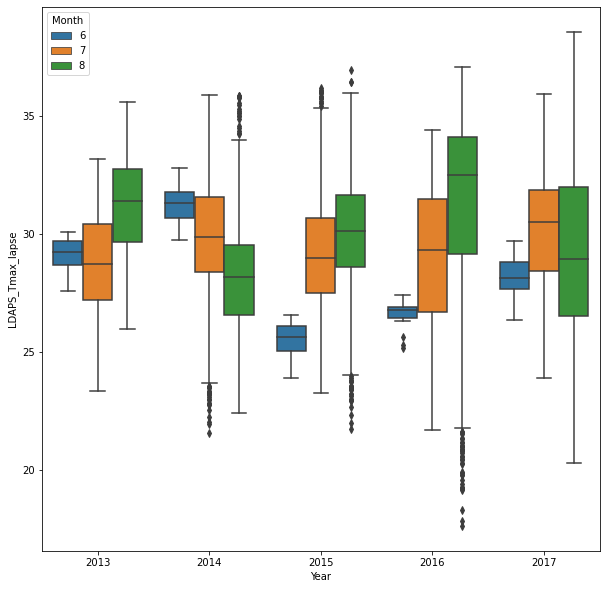

In [128]:
plt.subplots(figsize=(10,10))
sns.boxplot(x='Year',y='LDAPS_Tmax_lapse',hue='Month',data=df)

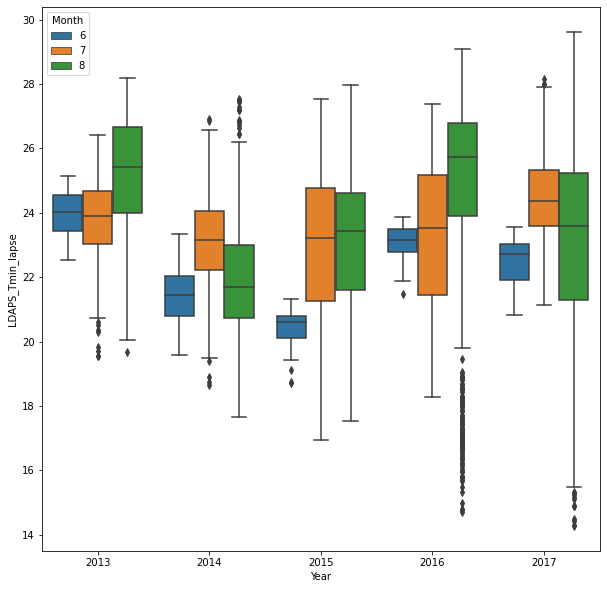

In [129]:
plt.subplots(figsize=(10,10))
sns.boxplot(x='Year',y='LDAPS_Tmin_lapse',hue='Month',data=df)

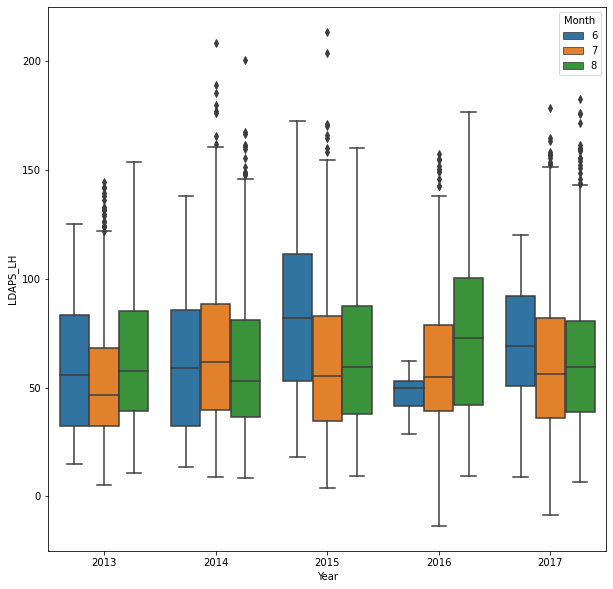

In [130]:
plt.subplots(figsize=(10,10))
sns.boxplot(x='Year',y='LDAPS_LH',hue='Month',data=df)

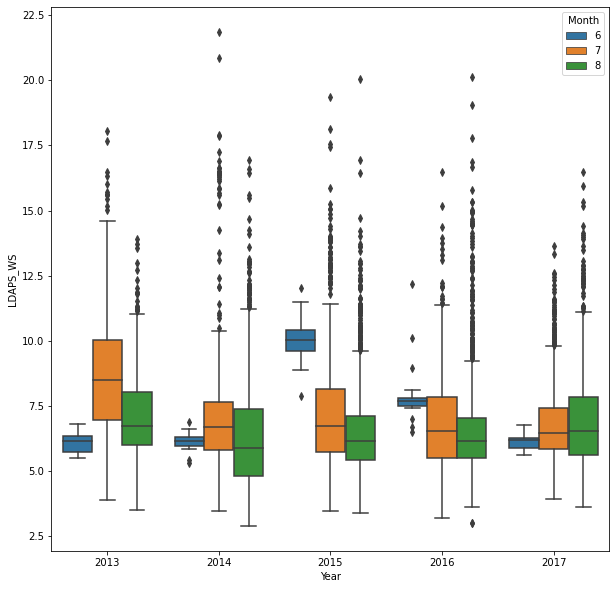

In [131]:
plt.subplots(figsize=(10,10))
sns.boxplot(x='Year',y='LDAPS_WS',hue='Month',data=df)

station                 AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Present_Tmax         AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Present_Tmin         AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
LDAPS_RHmin          AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
LDAPS_RHmax          AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
LDAPS_Tmax_lapse     AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
LDAPS_Tmin_lapse     AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
LDAPS_WS             AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
LDAPS_LH               AxesSubplot(0.125,0.518913;0.0824468x0.16413)
LDAPS_CC1           AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
LDAPS_CC2           AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
LDAPS_CC3           AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
LDAPS_CC4           AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
LDAPS_PPT1          AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
LDAPS_PPT2          AxesSubplot(0.

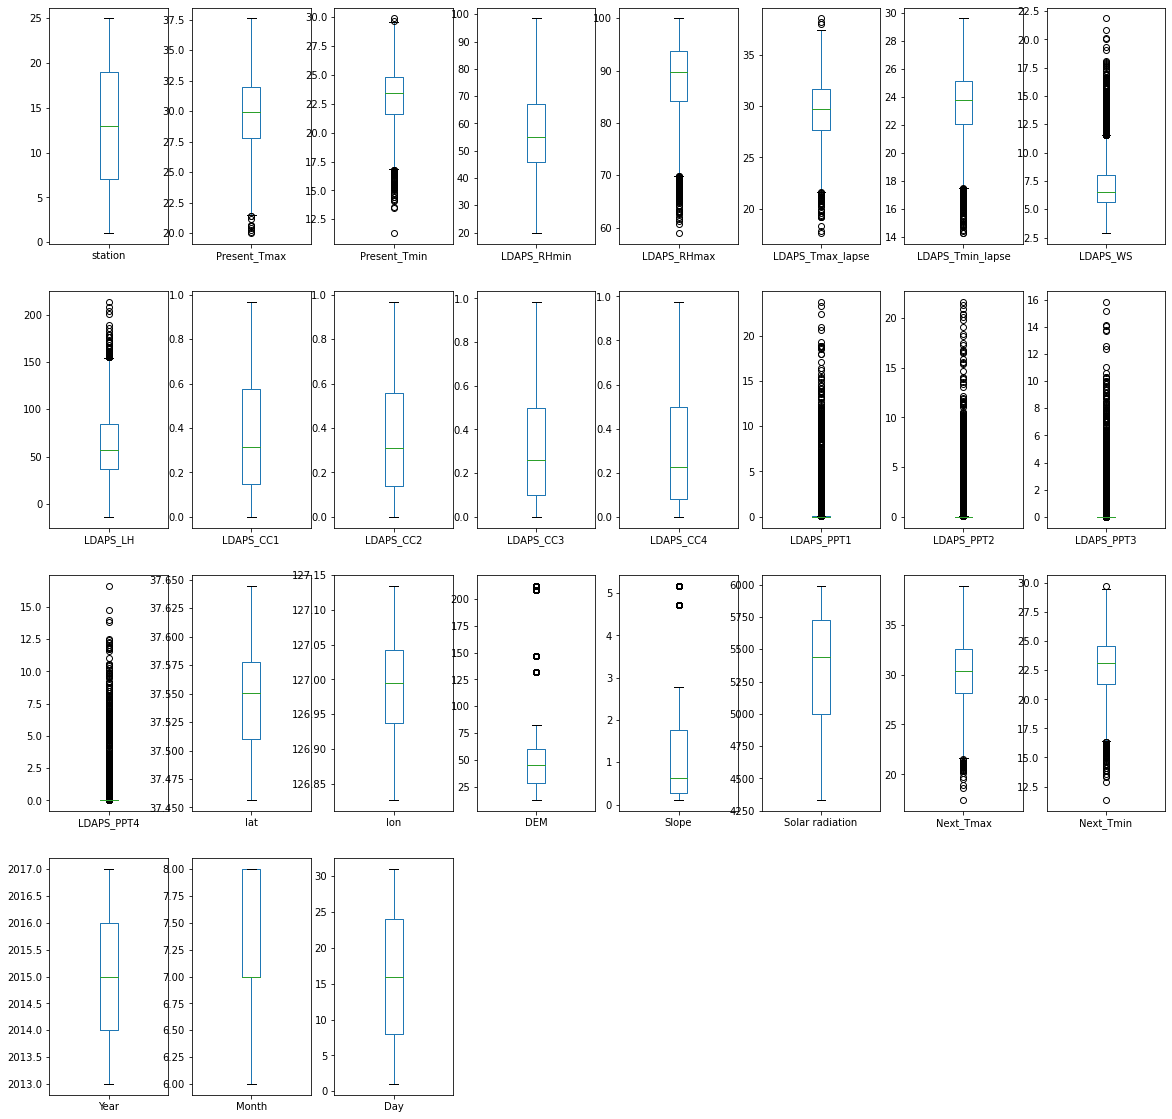

In [116]:
df.plot(kind='box',subplots=True,layout=(4,8),figsize=(20,20))

# Statistical Analysis

In [34]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,2014.991697,7.465999,15.939510
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,1.410877,0.528635,8.906521
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,2013.000000,6.000000,1.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,2017.000000,8.000000,31.000000


-> From the above analysis we can say that their quite large diff between 75% and max in LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4..So many outliers are their in these columns

<function matplotlib.pyplot.show(*args, **kw)>

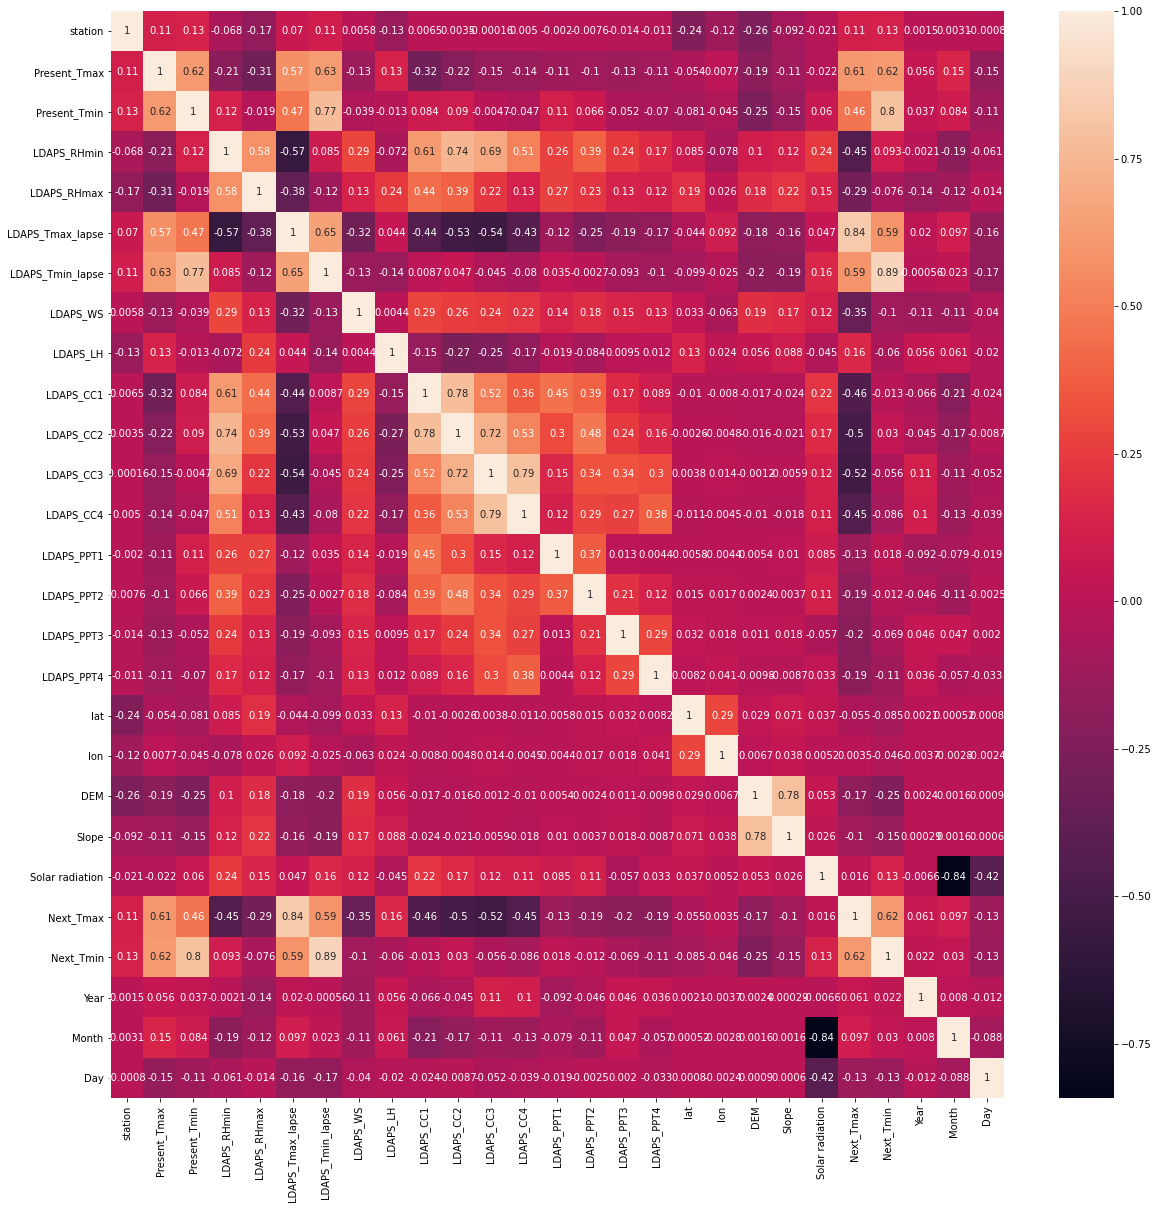

In [35]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show

In [36]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,0.003526,-0.000161,0.005005,-0.001954,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,0.001474,0.003114,-0.000799
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,-0.216976,-0.146391,-0.143069,-0.114917,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,0.056002,0.147358,-0.151982
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,0.090038,-0.004719,-0.046694,0.111577,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,0.037457,0.084047,-0.114294
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,0.744774,0.688069,0.513937,0.259039,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.002147,-0.190674,-0.060702
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,0.390620,0.224734,0.127242,0.268019,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.144286,-0.117317,-0.014242
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,-0.525380,-0.542728,-0.429739,-0.115659,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,0.020308,0.096915,-0.160191
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,0.046537,-0.044998,-0.079536,0.034956,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.000564,0.023412,-0.171284
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,0.257226,0.238155,0.218870,0.141503,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.114114,-0.113617,-0.040088
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,-0.265382,-0.246709,-0.173156,-0.018708,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,0.055898,0.060947,-0.019588
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,0.779510,0.516698,0.362670,0.446930,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.066233,-0.212477,-0.024234


In [37]:
df.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Year                  int64
Month                 int64
Day                   int64
dtype: object

# Removing Outliers

In [38]:
print("The shape before removing outliers",df.shape)
print("skewness before removing outliers")
print(df.skew())
from scipy.stats import zscore
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print("New shape after removing outliers",df1.shape)
print("skewness after removing outliers")
print(df1.skew())

The shape before removing outliers (7588, 27)
skewness before removing outliers
station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Year                0.013575
Month              -0.174856
Day                -0.010718
dtype: float64
New shape after removing outliers (6739, 27)
skewness after removing outliers
station            -0.001594
Present_Tmax   

# Splitting the data into input and target

Taking Next_Tmax as Target Variable

In [39]:
x=df1.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=df1['Next_Tmax']

In [40]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013,6,30


In [41]:
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [42]:
print(x.shape)
print(y.shape)

(6739, 25)
(6739,)


In [43]:
#  scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


# Importing Necessary libraries

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [46]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 84 is 0.7907718767912704


In [47]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())


Mean r2 score for Linear Regression: 0.647600284740176
standard deviation in r2 score for Linear Regression 0.060085528998021255


# Using GridSearchCV to find best parameters

In [48]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10),'algorithm':['auto', 'ball_tree', 'kd_tree']}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1],'selection' : ['cyclic', 'random']}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae'),'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

enr=ElasticNet()
parametors={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(enr,parametors)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150,200],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfr,parameters,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

svr=SVR()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [0.01,0.1,1,10]}
gd=GridSearchCV(svr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(gbr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")


{'algorithm': 'auto', 'n_neighbors': 9}


{'alpha': 0.1, 'selection': 'cyclic'}


{'criterion': 'friedman_mse', 'max_features': 'auto'}


{'alpha': 0.1}


{'max_features': 'auto', 'n_estimators': 200}


{'C': 10, 'kernel': 'rbf'}


{'learning_rate': 0.1, 'n_estimators': 120}




In [49]:
knn=KNeighborsRegressor(algorithm='auto', n_neighbors=9)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")

lsreg=Lasso(alpha=0.1, selection='cyclic')
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")


dtr=DecisionTreeRegressor(criterion = 'mae',max_features='auto')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")

enr=ElasticNet(alpha=0.1)
i=maxr2_score(enr,x,y)
print("\n")

print("Mean r2 score for Elastic net Regression:",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Elastic net Regression",cross_val_score(enr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")



rfr=RandomForestRegressor(max_features='auto',n_estimators=200)
i=maxr2_score(rfr,x,y)
print("\n")

print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=120)
i=maxr2_score(gbr,x,y)
print("\n")

print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


svr=SVR(C= 10, kernel= 'rbf')
i=maxr2_score(svr,x,y)
print("\n")

print("Mean r2 score for SVR:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for SVR",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


max r2 score corresponding to 52 is 0.5449595067060844


Mean r2 score for KNeighbor  Regression: 0.14812699111929004
standard deviation in r2 score for KNeighbor   Regression 0.186635875495211

___________________________________________________________________________________________________________

max r2 score corresponding to 52 is 0.7540444081958599


Mean r2 score for Lasso Regression: 0.6612787253690072
standard deviation in r2 score for Lasso Regression 0.06259793606579103

___________________________________________________________________________________________________________

max r2 score corresponding to 93 is 0.7807030255012523


Mean r2 score for DecisionTreeRegressor : 0.3938321496662921
standard deviation in r2 score for DecisionTreeRegressor 0.1143221884759924

_____________________________________________________________________________________________________________

max r2 score corresponding to 52 is 0.7618256747918843


Mean r2 score for Elastic net Regressio

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 84,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)


In [51]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.8806081603133069
r2_score is:  0.9131594408468605


# Taking Next_Tmin as Target Variable

In [52]:
x=df1.drop(['Next_Tmin','Next_Tmax'],axis=1)
y=df1['Next_Tmin']

In [53]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013,6,30


In [54]:
y.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [55]:
print(x.shape)
print(y.shape)

(6739, 25)
(6739,)


In [56]:
#  scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [58]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print("max r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [59]:
lreg=LinearRegression()
i=maxr2_score(lreg,x,y)

max r2 score corresponding to 70 is 0.8446468864315367


In [60]:
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())


Mean r2 score for Linear Regression: 0.7739586129615998
standard deviation in r2 score for Linear Regression 0.07284260467625737


In [61]:
knr=KNeighborsRegressor()
parameters={'n_neighbors':range(1,10),'algorithm':['auto', 'ball_tree', 'kd_tree']}
gd=GridSearchCV(knr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1],'selection' : ['cyclic', 'random']}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

dtr=DecisionTreeRegressor()
parameters={'criterion':('mse', 'friedman_mse', 'mae'),'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

enr=ElasticNet()
parametors={"alpha":[0.001,0.01,0.1,1]}
gd=GridSearchCV(enr,parametors)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

rfr=RandomForestRegressor()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfr,parameters,cv=5)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

svr=SVR()
parameters={"kernel" : ( "Linear" ,"rbf" ) ,"C": [1,10]}
gd=GridSearchCV(svr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")

gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbr,parameters)
gd.fit(x,y)
print(gd.best_params_)
print("\n")


{'algorithm': 'auto', 'n_neighbors': 9}


{'alpha': 0.01, 'selection': 'cyclic'}


{'criterion': 'mse', 'max_features': 'auto'}


{'alpha': 0.1}


{'max_features': 'auto', 'n_estimators': 120}


{'C': 10, 'kernel': 'rbf'}


{'learning_rate': 0.1, 'n_estimators': 100}




In [62]:
knn=KNeighborsRegressor(algorithm='auto', n_neighbors=9)
i=maxr2_score(knn,x,y)
print("\n")

print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")

lsreg=Lasso(alpha=0.01, selection='cyclic')
i=maxr2_score(lsreg,x,y)
print("\n")

print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print("\n___________________________________________________________________________________________________________\n")


dtr=DecisionTreeRegressor(criterion = 'mse',max_features='auto')
i=maxr2_score(dtr,x,y)
print("\n")

print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")

enr=ElasticNet(alpha=0.1)
i=maxr2_score(enr,x,y)
print("\n")

print("Mean r2 score for Elastic net Regression:",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Elastic net Regression",cross_val_score(enr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")



rfr=RandomForestRegressor(max_features='auto',n_estimators=120)
i=maxr2_score(rfr,x,y)
print("\n")

print("Mean r2 score for RandomForestRegressor :",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for RandomForestRegressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
i=maxr2_score(gbr,x,y)
print("\n")

print("Mean r2 score for gradient boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


svr=SVR(C= 10, kernel= 'rbf')
i=maxr2_score(svr,x,y)
print("\n")

print("Mean r2 score for SVR:",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for SVR",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())
print("\n_____________________________________________________________________________________________________________\n")


max r2 score corresponding to 48 is 0.5328554809809521


Mean r2 score for KNeighbor  Regression: 0.03269990817958988
standard deviation in r2 score for KNeighbor   Regression 0.29099925219941447

___________________________________________________________________________________________________________

max r2 score corresponding to 70 is 0.8419827485546849


Mean r2 score for Lasso Regression: 0.7767618920803223
standard deviation in r2 score for Lasso Regression 0.07355574869200074

___________________________________________________________________________________________________________

max r2 score corresponding to 76 is 0.802277714635186


Mean r2 score for DecisionTreeRegressor : 0.5838846325286189
standard deviation in r2 score for DecisionTreeRegressor 0.1045018219030889

_____________________________________________________________________________________________________________

max r2 score corresponding to 70 is 0.8371109689754105


Mean r2 score for Elastic net Regressi

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 82,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)


In [64]:
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.7091921947353373
r2_score is:  0.9100492060134677


# Saving Model

In [65]:
import joblib
model=joblib.dump(rfr,"Temperature_Forcast-pred.pkl")